## Algorithms Project: The Big Heist

### Description

Given list of bank locations, how much money each one holds and the time it would take to rob each one, you need to apply your hard-won algorithm knowledge to make as much profit as possible! I bet you didn't think that data science could be this profitable!

You will design and write a solution to an NP-Had algorithm to this problem

You will need to apply all the knowledge learned up to now to get the best possible result at this task given a large list of banks and 3 minutes to run your algorithm.

You have 24 hours to make as much money as possible and then escape.

### Rules:

Your run can start anywhere on the map but it has to end at the helicopter escape zone: coordinates (0,0)

If you try to rob too many banks and can't get to the helicopter in 24 hours, you get caught and go to jail.
Your solution is a list or array of integers (eg. [580, 433, 24, 998]) where the numbers are the IDs of each banks. The ID of each bank is their index (their row index).

You travel between banks at 30 km/h. You have to travel from one bank to the next!

Remember the formula to calculate the distance between two points.
The coordinates are in kilometers.
So (1, 1) and (1, 2) are one kilometer apart.
This would take 1 / 30 hour = 2 minutes to travel
Your solution should be an approximative/heuristic algorithm

This problem is NP-Hard, you won't find a fast enough algorithm that has the perfect solution
It doesn't need to find the best solution
Find the best solution you can!
Your solution has to run on a common laptop in under 3 minutes for the 10,000 cities dataset

You can use everything you want to achieve this:
Use numpy, pandas, functions, algorithms
You can use parallelism
Use optimied libraries (pandas, numba, scipy, etc.)
Test your code on small subsets of the data so they run fast
Then scale your code up to bigger chunks of the data

## Import Libararies

In [7]:
from scipy.spatial import KDTree
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from utils.check_solution import check_solution

## Prepare Data Frame

In [8]:
df = pd.read_csv('data/bank_data.csv')
df['profit'] = df['money'] / df['time (hr)']
df = df.sort_values(by='profit', ascending=False)
df = df.head(296)  
df = df.reset_index(drop=True)

## Defining Functions

In [9]:
def travel_time(distance):
    return distance / 30

def robber_algorithm(df):
    path = []
    current_time = 0
    starting_bank = df.loc[df['profit'].idxmax()]
    current_location = np.array([starting_bank['x_coordinate'], starting_bank['y_coordinate']])
    df = df.drop(starting_bank.name)

    # Build the KDTree with the bank coordinates
    tree = KDTree(df[['x_coordinate', 'y_coordinate']])

    while current_time < 24 and not df.empty:
        # Query the tree for the closest bank
        distance, index = tree.query(current_location, 1)
        best_bank = df.iloc[index]

        time_to_rob = travel_time(distance) + best_bank['time (hr)']

        if current_time + time_to_rob + travel_time(euclidean([best_bank['x_coordinate'], best_bank['y_coordinate']], [0, 0])) > 24:
            break

        path.append(best_bank.name)
        current_location = np.array([best_bank['x_coordinate'], best_bank['y_coordinate']])
        current_time += time_to_rob

        # Remove the robbed bank from the DataFrame and the tree
        df = df.drop(best_bank.name)
        tree = KDTree(df[['x_coordinate', 'y_coordinate']])

    return path

result = robber_algorithm(df)
print(result)
print('\nThe number of banks that we said hi was', len(result))

score = check_solution(result, df)
print(f'Score: {score}$')

[57, 173, 90, 55, 205, 295, 56, 20, 251, 289, 131, 122, 133, 22, 16, 216, 211, 186, 128, 190, 189, 207, 252, 157, 246, 76, 93, 150, 135, 163, 170, 257, 212, 25, 270, 2, 226, 144, 49, 275, 183, 26, 260, 59, 18, 11, 237, 276, 60, 40, 268, 201, 175, 236, 125, 143, 176, 285, 7, 219, 161, 156, 241, 43, 171, 105, 250, 79, 14, 120, 179, 31, 139, 118, 32, 199, 62, 110, 284, 5, 87, 272, 152, 44, 88, 78, 167, 222, 271, 81, 134, 68, 162, 287, 206, 232, 273, 29, 178, 1, 142, 132, 292, 75, 195, 61, 192, 85, 23, 243, 104, 6, 225, 80, 83, 264, 67, 10, 19, 151, 294, 245, 137, 224, 214, 84, 217, 36, 13, 155, 278, 290, 281, 191, 288, 269, 54, 194, 47, 41, 98, 108, 28, 37, 227, 253, 42, 140, 107, 117, 180, 240, 282, 148, 248, 141, 215, 116, 261, 136, 52, 92, 114, 202, 231, 200, 159, 220, 145, 280, 102, 53, 82, 185, 213, 4, 174, 254, 188, 91, 247, 165, 235, 218, 169, 109, 24, 203, 21, 187, 73, 255, 101, 277, 100, 147, 30, 58, 230, 146, 123, 242, 238, 267, 130, 274, 106, 124, 99, 64, 204, 197, 115, 121, 12

## Visualization

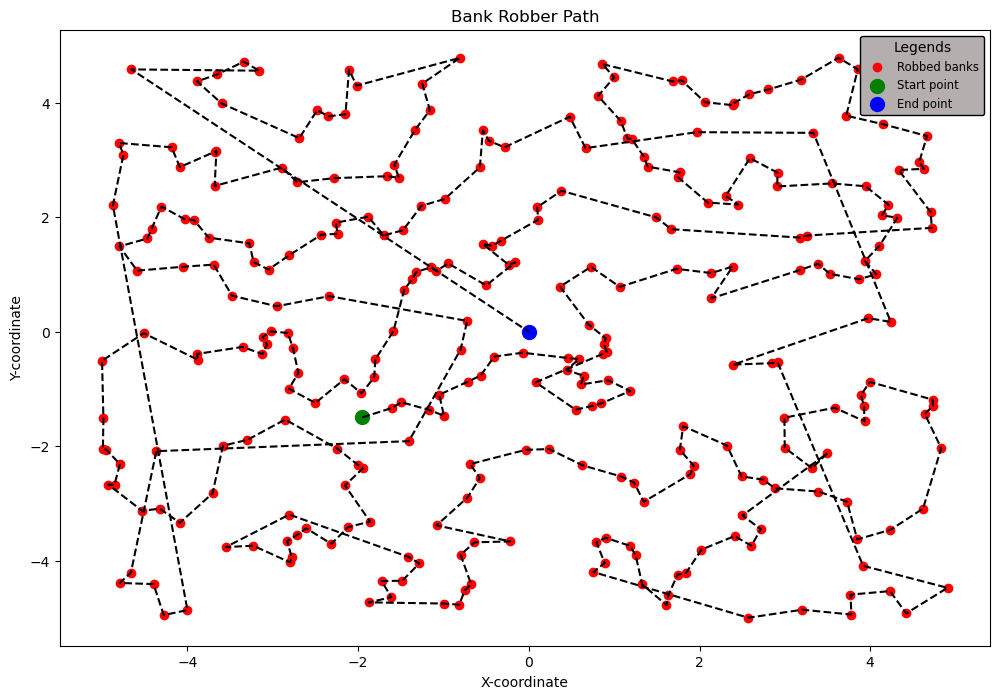

In [14]:
import matplotlib.pyplot as plt

def plot_path(df, path):
    path_df = df.loc[path]

    starting_bank = df.loc[df['profit'].idxmax()]
    start = pd.DataFrame({'x_coordinate': [starting_bank['x_coordinate']], 'y_coordinate': [starting_bank['y_coordinate']]})
    end = pd.DataFrame({'x_coordinate': [0], 'y_coordinate': [0]})
    path_df = pd.concat([start, path_df, end], ignore_index=True)

    plt.figure(figsize=(12, 8))
    plt.scatter(path_df['x_coordinate'][1:-1], path_df['y_coordinate'][1:-1], color='red', label='Robbed banks')
    plt.scatter(start['x_coordinate'], start['y_coordinate'], s = 100, color='green', label='Start point')
    plt.scatter(0, 0, color='blue', s = 100, label='End point')

    plt.plot(path_df['x_coordinate'], path_df['y_coordinate'], color='black', linestyle='dashed')

    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    legend = plt.legend(title = "Legends", fontsize='small')
    frame = legend.get_frame()
    frame.set_facecolor('#b4aeae')
    frame.set_edgecolor('black')
    frame.set_alpha(1)
    plt.title('Bank Robber Path')
    plt.show()
    
    
    
plot_path(df,result)

